# Tutorial for handling netcdf time-series data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from mycurrents import oceanmooring as om

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode EXPIRED 47 days ago

    Your usage of mkl is now out of compliance with the license agreement.
    A license for mkl can be purchased at: http://continuum.io
    


# Example 1 - Load a gridded dataset as an OceanMooring object

This example demonstrates some of the capabilities of the `OceanMooring` object in [mycurrents](https://bitbucket.org/mrayson/mycurrents/src/master/oceanmooring.py) module.

In [3]:
#####
# Inputs

ncfile = '../ProcessedData/UWABB2010_Gridded_Mooring_T.nc'
varname = 'temperature'
group = 'UWA_Browse_100m_SBE_T'


#####

In [4]:
### Load the netcdf data as an OceanMooring objec

data = om.from_netcdf(ncfile, varname, group=group)
data

OceanMooring(Nz=12, Nt=219934)
	variable:  [degC]

In [18]:
### Contour plot of the temperature

# Contour level
clevs = np.arange(20,32.,1.)
clevsfine = np.arange(20,32.,1.)

# Set the time limits of the plot
tstart = datetime(2010,3,29,2,0,0)
tend = datetime(2010,3,29,7,0,0)
t0,t1 = data.get_tslice(tstart, tend)
t0,t1

(12816, 13537)

(<matplotlib.contour.QuadContourSet at 0x7f6979f74b10>, None)

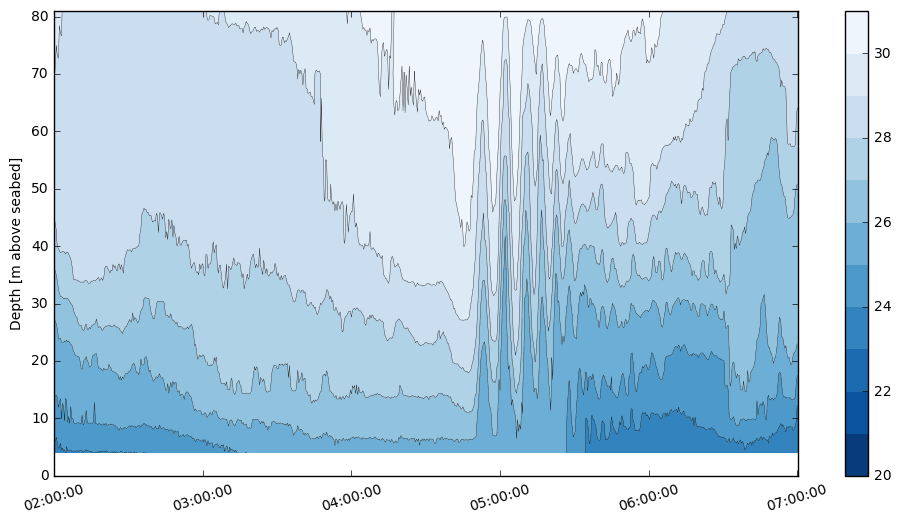

In [20]:
# The class has its own contourf method
plt.figure(figsize=(12,6))
data.contourf(clevs, t0=t0, t1=t1, cmap='Blues_r')
data.contourf(clevsfine, filled=False, cbar=False,t0=t0, t1=t1)
#plt.ylim(0,200)

# Example 2 - Extract an isovalue from a gridded dataset

The OceanMooring object has built in methods for:

 - isoslice: extracting isovalue
 - depthavg: depth average
 - depthint: depth integration 
 - grad_z: vertical gradient i.e. calculate shear, dT/dz, ...
 - ...


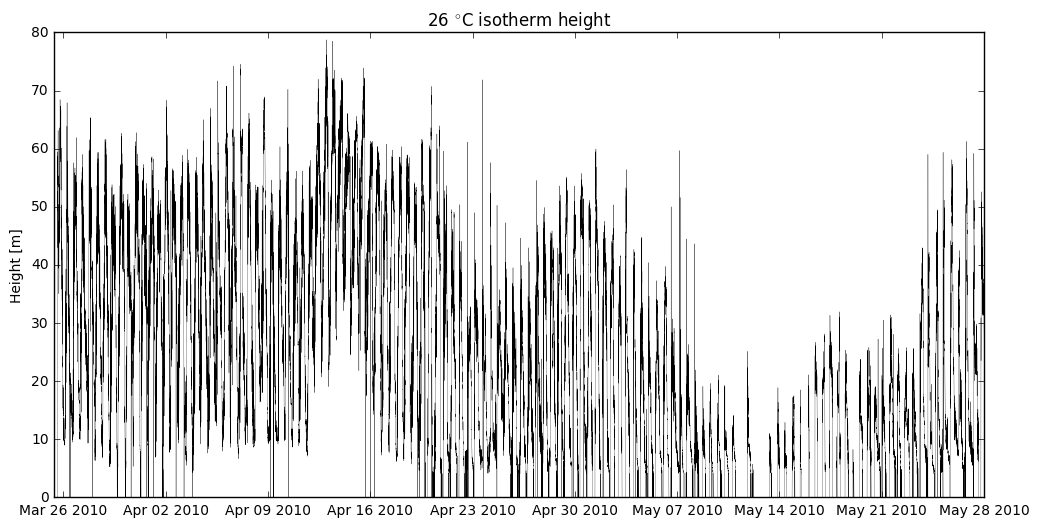

In [28]:
# Extract the 26 deg C isotherm and plot
t26 = data.isoslice(26)

plt.figure(figsize=(12,6))
plt.plot(data.t, t26, 'k', lw=0.2)
plt.ylabel('Height [m]')
plt.title('26 $^{\circ}$C isotherm height')
